# **Vessel Boost Toolbox**
## Module - test_time_adaptation.py
Vessel Boost toolbox provides a test-time-adaptation module for further optimization of a pre-trained model.

### Pre-trianed models promptly available on OSF
We are currently providing 3 pre-trained models, you can download them to make infetence on your images by running the following cell:\
\
When doing in on Terminal, you could run the following code to create a path to save our provided pre-trained models. While in this tutorial notebook, we used Python os library to change work directory.


```bash
mkdir ./../saved_models
cd ./../saved_models/

# Each line of code below corresponds to a pre-trained model provide by us
osf -p abk4p fetch /pretrained_models/manual_ep1000_1029
osf -p abk4p fetch /pretrained_models/om1_ep1000_1029
osf -p abk4p fetch /pretrained_models/om2_ep1000_1029
```


In [1]:
import os
os.chdir('./../saved_models/')

!osf -p abk4p fetch /pretrained_models/manual_ep1000_1029 ./test_model
# !osf -p abk4p fetch /pretrained_models/om1_ep1000_1029
# !osf -p abk4p fetch /pretrained_models/om2_ep1000_1029

100%|██████████████████████████████████| 26.4M/26.4M [00:00<00:00, 43.7Mbytes/s]


For this example notebook, we also provide a public MR image data to demonstrate the output results:

In [2]:
# Download the data
!osf -p nr6gc fetch /osfstorage/twoEchoTOF/withSkull/GRE_3D_400um_TR20_FA18_TE7p5_14_sli52_FCY_GMP_BW200_32_biasCor.nii ./../../data/img/GRE_400um.nii

100%|████████████████████████████████████| 164M/164M [00:01<00:00, 93.3Mbytes/s]


### TTA without proxies provided
You could apply this module directly on your on data without providing the proxy segmentation. This module will automatically generate proxies and finetune the model. If you set argument *-prep_mode* to 4, then no preprocessing (N4 bias field correction, denoising) will happen, and you don't need to set a path specificly to store the preprocessed images. Note that the input path must only contain the nifti images for processing and be different to the output path.

In [3]:
!python ./../test_time_adaptation.py --ds_path ./../../data/img/ --out_path ./../../saved_imgs/generated_tta_label/ --pretrained ./../saved_models/test_model --prep_mode 4 --ep 100 --lr 1e-3 

./../../saved_imgs/generated_tta_label/ does not exist.
./../../saved_imgs/generated_tta_label/ has been created!
./../../saved_imgs/generated_tta_label/proxies/ does not exist.
./../../saved_imgs/generated_tta_label/proxies/ has been created!
./../../saved_imgs/generated_tta_label/finetuned/ does not exist.
./../../saved_imgs/generated_tta_label/finetuned/ has been created!
TTA session will start shortly..
Aborting the preprocessing procedure!

No proxies are provided, strating generating proxies...
Running with GPU
Prediction procedure starts!
100%|█████████████████████████████████████████████| 6/6 [00:33<00:00,  5.62s/it]
Prediction procedure ends! Please wait for the post processing!
Output processed GRE_400um.nii is successfully saved!

Prediction and thresholding procedure end!

Proxies are provided!
Running with GPU
The chosen model is: ./../saved_models/test_model
Finetuning procedure starts!
Epoch: [1/100], Loss:  0.4133, Current learning rate:  0.00100000               
Epoch

Vessel Boost will generate both .nii segmentation file and its maximum intensity projection (.jpg). View the maximum intensity projection of the generated segmentation:

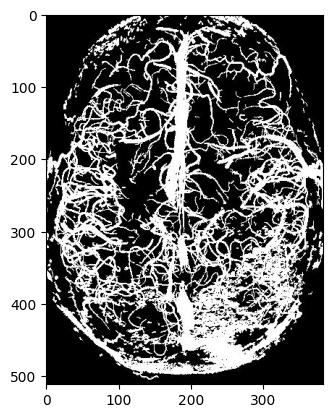

In [4]:
import matplotlib.pyplot as plt
import matplotlib.image as img

mip_image = img.imread("./../../saved_imgs/generated_tta_label/GRE_400um.jpg")
plt.imshow(mip_image, cmap='gray')

Similar to the **training** and **inference** modules (train.py and inference.py), if you set *-prep_mode* to 1,2 or 3, which means, (1) N4 bias field correction, (2)denosing, or (3) both N4 biasfield correction and denoising will be applied to the input images, and you have to set a path to store the preprocessed images:

In [5]:
!python ./../test_time_adaptation.py --ds_path ./../../data/img/ --ps_path ./../../data/preprocessed/ --out_path ./../../saved_imgs/generated_tta_label_2/ --pretrained ./../saved_models/test_model --prep_mode 1 --ep 100 --lr 1e-3 

./../../saved_imgs/generated_tta_label_2/ does not exist.
./../../saved_imgs/generated_tta_label_2/ has been created!
./../../saved_imgs/generated_tta_label_2/proxies/ does not exist.
./../../saved_imgs/generated_tta_label_2/proxies/ has been created!
./../../saved_imgs/generated_tta_label_2/finetuned/ does not exist.
./../../saved_imgs/generated_tta_label_2/finetuned/ has been created!
TTA session will start shortly..
The preprocessing procedure is starting!

100%|█████████████████████████████████████████████| 1/1 [01:32<00:00, 92.30s/it]
All processed images are successfully saved!
No proxies are provided, strating generating proxies...
Running with GPU
Prediction procedure starts!
100%|█████████████████████████████████████████████| 6/6 [00:36<00:00,  6.11s/it]
Prediction procedure ends! Please wait for the post processing!
Output processed GRE_400um.nii is successfully saved!

Prediction and thresholding procedure end!

Proxies are provided!
Running with GPU
The chosen model is: ./.

View the MIP image:

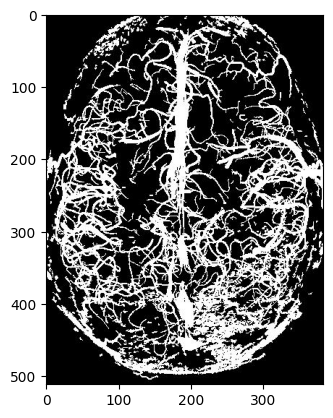

In [6]:
mip_image = img.imread("./../../saved_imgs/generated_tta_label_2/GRE_400um.jpg")
plt.imshow(mip_image, cmap='gray')

### TTA with proxies provided

You can provide a proxy segmentation which will be used for the test-time-adaption instead of the automatically generated proxies. This segmentation can be created using any methods, for example manual labelling or other, non-deep-learning methods. We will use the filenames to match the raw images and proxy segmentations.\
In the following example, we simply used the proxy segmentation generated by the previous section:

In [7]:
!python ./../test_time_adaptation.py --ds_path ./../../data/img/ --px_path ./../../saved_imgs/generated_tta_label/proxies/ --out_path ./../../saved_imgs/generated_tta_label_3/ --pretrained ./../saved_models/test_model --prep_mode 4 --ep 100 --lr 1e-3 

./../../saved_imgs/generated_tta_label_3/ does not exist.
./../../saved_imgs/generated_tta_label_3/ has been created!
./../../saved_imgs/generated_tta_label_3/finetuned/ does not exist.
./../../saved_imgs/generated_tta_label_3/finetuned/ has been created!
TTA session will start shortly..
Aborting the preprocessing procedure!

Proxies are provided!
Running with GPU
The chosen model is: ./../saved_models/test_model
Finetuning procedure starts!
Epoch: [1/100], Loss:  0.3601, Current learning rate:  0.00100000               
Epoch: [2/100], Loss:  0.7055, Current learning rate:  0.00100000               
Epoch: [3/100], Loss:  0.3994, Current learning rate:  0.00100000               
Epoch: [4/100], Loss:  0.3986, Current learning rate:  0.00100000               
Epoch: [5/100], Loss:  0.4597, Current learning rate:  0.00100000               
Epoch: [6/100], Loss:  0.4231, Current learning rate:  0.00100000               
Epoch: [7/100], Loss:  0.3792, Current learning rate:  0.00100000   

MIP image:

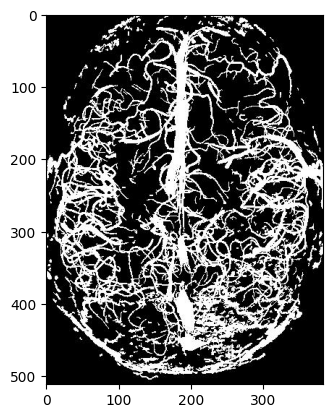

In [8]:
mip_image = img.imread("./../../saved_imgs/generated_tta_label_3/GRE_400um.jpg")
plt.imshow(mip_image, cmap='gray')

Similar to the previous section, you can also activate the preoprocessing mode:

In [9]:
!python ./../test_time_adaptation.py --ds_path ./../../data/img/ --px_path ./../../saved_imgs/generated_tta_label_2/proxies/ --ps_path ./../../data/preprocessed/ --out_path ./../../saved_imgs/generated_tta_label_4/ --pretrained ./../saved_models/test_model --prep_mode 1 --ep 100 --lr 1e-3 

./../../saved_imgs/generated_tta_label_4/ does not exist.
./../../saved_imgs/generated_tta_label_4/ has been created!
./../../saved_imgs/generated_tta_label_4/finetuned/ does not exist.
./../../saved_imgs/generated_tta_label_4/finetuned/ has been created!
TTA session will start shortly..
The preprocessing procedure is starting!

100%|█████████████████████████████████████████████| 1/1 [01:32<00:00, 92.94s/it]
All processed images are successfully saved!
Proxies are provided!
Running with GPU
The chosen model is: ./../saved_models/test_model
Finetuning procedure starts!
Epoch: [1/100], Loss:  0.3713, Current learning rate:  0.00100000               
Epoch: [2/100], Loss:  0.7969, Current learning rate:  0.00100000               
Epoch: [3/100], Loss:  0.4737, Current learning rate:  0.00100000               
Epoch: [4/100], Loss:  0.4213, Current learning rate:  0.00100000               
Epoch: [5/100], Loss:  0.4642, Current learning rate:  0.00100000               
Epoch: [6/100], Loss

View the MIP image:

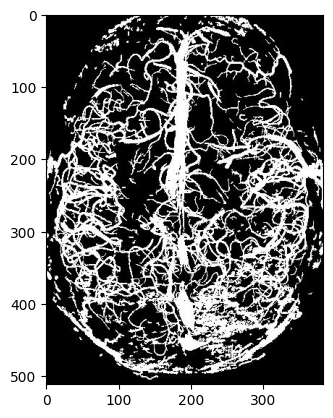

In [10]:
mip_image = img.imread("./../../saved_imgs/generated_tta_label_4/GRE_400um.jpg")
plt.imshow(mip_image, cmap='gray')